# Project - Investigating Fandango Movie Ratings
---

This project will investigate whether or not [Fandango](https://www.fandango.com/) (an online movie rating aggregator) is still over inflating ratings. This analysis comes back off the back an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) written by Walt Hickey in October 2015 that suggested from a 8% sample that round displayed on the page was unusally rounded based off the HTML of the page. The distribution of the over inflated ratings vs the HTML ratings is shown below:

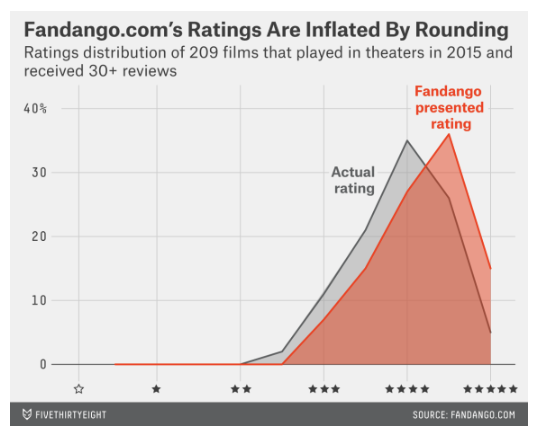


This project will look into data from 2016-2017 to check whether this over inflating practise is continuing and compare it to data used in the Hickley article, the datasets used are:

- `fandango_score_comparison.csv`

---

|    | FILM                           |   RottenTomatoes |   RottenTomatoes_User |   Metacritic |   Metacritic_User |   IMDB |   Fandango_Stars |   Fandango_Ratingvalue |   RT_norm |   RT_user_norm |   Metacritic_norm |   Metacritic_user_nom |   IMDB_norm |   RT_norm_round |   RT_user_norm_round |   Metacritic_norm_round |   Metacritic_user_norm_round |   IMDB_norm_round |   Metacritic_user_vote_count |   IMDB_user_vote_count |   Fandango_votes |   Fandango_Difference |
|---:|:-------------------------------|-----------------:|----------------------:|-------------:|------------------:|-------:|-----------------:|-----------------------:|----------:|---------------:|------------------:|----------------------:|------------:|----------------:|---------------------:|------------------------:|-----------------------------:|------------------:|-----------------------------:|-----------------------:|-----------------:|----------------------:|
|  0 | Avengers: Age of Ultron (2015) |               74 |                    86 |           66 |               7.1 |    7.8 |                5 |                    4.5 |      3.7  |            4.3 |              3.3  |                  3.55 |        3.9  |             3.5 |                  4.5 |                     3.5 |                          3.5 |               4   |                         1330 |                 271107 |            14846 |                   0.5 |
|  1 | Cinderella (2015)              |               85 |                    80 |           67 |               7.5 |    7.1 |                5 |                    4.5 |      4.25 |            4   |              3.35 |                  3.75 |        3.55 |             4.5 |                  4   |                     3.5 |                          4   |               3.5 |                          249 |                  65709 |            12640 |                   0.5 |
|  2 | Ant-Man (2015)                 |               80 |                    90 |           64 |               8.1 |    7.8 |                5 |                    4.5 |      4    |            4.5 |              3.2  |                  4.05 |        3.9  |             4   |                  4.5 |                     3   |                          4   |               4   |                          627 |                 103660 |            12055 |                   0.5 |

---

- `movie_ratings_16_17.csv`

---
|    | movie               |   year |   metascore |   imdb |   tmeter |   audience |   fandango |   n_metascore |   n_imdb |   n_tmeter |   n_audience |   nr_metascore |   nr_imdb |   nr_tmeter |   nr_audience |
|---:|:--------------------|-------:|------------:|-------:|---------:|-----------:|-----------:|--------------:|---------:|-----------:|-------------:|---------------:|----------:|------------:|--------------:|
|  0 | 10 Cloverfield Lane |   2016 |          76 |    7.2 |       90 |         79 |        3.5 |          3.8  |     3.6  |        4.5 |         3.95 |            4   |       3.5 |         4.5 |           4   |
|  1 | 13 Hours            |   2016 |          48 |    7.3 |       50 |         83 |        4.5 |          2.4  |     3.65 |        2.5 |         4.15 |            2.5 |       3.5 |         2.5 |           4   |
|  2 | A Cure for Wellness |   2016 |          47 |    6.6 |       40 |         47 |        3   |          2.35 |     3.3  |        2   |         2.35 |            2.5 |       3.5 |         2   |           2.5 |

---

In [2]:
# Importing libraries used throughout this lession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown # For displaying dataframes in markdown
import pyperclip
pd.options.display.max_columns = 100  # Avoid having displayed truncated output

# for some web srapping 
import requests  # for API requests
from bs4 import BeautifulSoup  # instead of using the above
import json  # for json conversion

# from scipy.stats import percentileofscore
# import datetime as dt
# import re # for regular expressions
# import altair as alt # for interactive plots
# from IPython.display import HTML  # for display HTML in jupyterlab
# from IPython.display import display # for display more than one pandas df at once
# importing requests: a library for making HTTP requests to APIs.

## 1. Understanding the Data
---

In [3]:
# Reading fandango_score_comparison.csv as pandas datafranme (df)
fandango_2015_df = pd.read_csv('data/fandango_score_comparison.csv')

# Copying first 3 rows to clipboard for markdown display above
markdown_output = fandango_2015_df.head(3).to_markdown()
pyperclip.copy(markdown_output)

In [4]:
# Repeating the above but for movie_ratings_16_17.csv
fandango_2016_df = pd.read_csv('data/movie_ratings_16_17.csv')

# Copying first 3 rows to clipboard for markdown display above
markdown_output = fandango_2016_df.head(3).to_markdown()
pyperclip.copy(markdown_output)

<font size="3"> Extracting columns of interest. <font>

In [5]:
# fandango_before_df refers to Fandango data before the article
fandango_previous_df = fandango_2015_df[['FILM', 'Fandango_Stars', 
                                      'Fandango_Ratingvalue', 'Fandango_votes',
                                      'Fandango_Difference']].copy()

# fandango_after_df refers to Fandango data after the article

fandango_after_df = fandango_2016_df[['movie', 'year', 'fandango']].copy()

In [6]:
fandango_previous_df.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [7]:
fandango_after_df.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


Our objective is to assess whether any changes were made to Fandango's rating system after Hickey's analysis by comparing movie ratings sampled before and after the analysis. The population of interest includes all movie ratings on Fandango's website, regardless of release year.

To accurately describe the population, we must ensure that our samples are representative. One sample was taken prior to the analysis, and the other was taken after the analysis. Hickey's sampling criteria, as described in his article and data repository [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md), included movies with at least 30 fan ratings on Fandango's website and tickets on sale in 2015. The sample is not random as not every movie had the same chance of being selected, with no movies under 30 fans ratings for example, the sample is also subject to temporal trends.

Similarly, the criteria for the second sample, as stated in the data repository [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), included movies released in 2016 or later with a considerable number of votes and reviews. This sample is also subject to temporal trends and is unlikely to be representative of our population of interest.

Both authors of our data used **purposive sampling** (or judgmental/selective/subjective sampling) to fit their research questions, but their samples may not be useful for our analysis.

Given the samples are not random and therefore, do not represent the whole population (set of movies in this case) this project can take two directions from here, either: collect more data (in an attempt to make it 'perfect'), or place limitations what the analysis. Getting perfect data is nearly impossible in most cases, so this project will continue with limitations.

## 2. Changing the Goal of the Analysis
---

Given the two datasets are not representative of the entire movie population and both not like for like this project will change its question from determining whether the over-inflated ratings are continuing and more broadly asking what is there is a significant difference in ratings of 'popular' movies between the two years/datasets. This new question still provides are 'good' proxy for the initial question of the project. 

## 3. Isolating the Sample
---

The term 'popular' is vague and is unfortunately not stated in our 2016-2017 [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md). However, for the 2015 data, it was stated to be any movie with more than 30 fan ratings. This could be used as a metric, unfortunately, the 2016-2017 dataset does not include information about the number of fan ratings and so there is no way of knowing from the dataset itself whether the movies it contains are in fact 'popular'.

A quick and rough workaround for this could be to take a random sample of say approximately `10%` of the dataset (in this case the 2016-2017 dataset `fandango_after_df` contains `214` movies so a sample of `20` will do) and then from that sample manually check the number of fan ratings on the website. 

The criteria for declaring that the dataset does contain popular movies would be for `80%` of the sample to contain movies with a fan rating number of 30 or more. There is one more caveat with this approach and that is the number of fan ratings is affect by temporal trends (time-variant).

In [8]:
fandango_after_df.shape

(214, 3)

### 3.1. Checking if 2016 Dataset Holds 'Popular' Movies

Generating a sample

In [9]:
fan_rating_sample_df = fandango_after_df.sample(20, random_state=1)
markdown_output = fan_rating_sample_df.to_markdown()
pyperclip.copy(markdown_output)

|     | movie                                            |   year |   fandango |
|----:|:-------------------------------------------------|-------:|-----------:|
| 108 | Mechanic: Resurrection                           |   2016 |        4   |
| 206 | Warcraft                                         |   2016 |        4   |
| 106 | Max Steel                                        |   2016 |        3.5 |
| 107 | Me Before You                                    |   2016 |        4.5 |
|  51 | Fantastic Beasts and Where to Find Them          |   2016 |        4.5 |
|  33 | Cell                                             |   2016 |        3   |
|  59 | Genius                                           |   2016 |        3.5 |
| 152 | Sully                                            |   2016 |        4.5 |
|   4 | A Hologram for the King                          |   2016 |        3   |
|  31 | Captain America: Civil War                       |   2016 |        4.5 |
| 118 | Mr. Church                                       |   2016 |        4.5 |
|  39 | Crouching Tiger, Hidden Dragon: Sword of Destiny |   2016 |        4   |
|  93 | Kung Fu Panda 3                                  |   2016 |        4.5 |
|  69 | Hidden Figures                                   |   2016 |        5   |
| 161 | The Autopsy of Jane Doe                          |   2016 |        4.5 |
| 112 | Misconduct                                       |   2016 |        3   |
|  94 | La La Land                                       |   2016 |        4   |
|  97 | Live by Night                                    |   2016 |        3.5 |
| 151 | Suicide Squad                                    |   2016 |        4   |
|  38 | Criminal                                         |   2016 |        4   |

Above a random seed of 1 was used, which highlights that the sample was not repeatedly regenerated in order to get a favourable sample.

---
Next a dictionary with the movie names in the sample will be generated with value of empty strings `''`. Which will be manually filled with the Fandango movies' URLs.

In [10]:
url_dict = dict(zip(fan_rating_sample_df['movie'], ['']*len(fan_rating_sample_df)))
url_dict

{'Mechanic: Resurrection': '',
 'Warcraft': '',
 'Max Steel': '',
 'Me Before You': '',
 'Fantastic Beasts and Where to Find Them': '',
 'Cell': '',
 'Genius': '',
 'Sully': '',
 'A Hologram for the King': '',
 'Captain America: Civil War': '',
 'Mr. Church': '',
 'Crouching Tiger, Hidden Dragon: Sword of Destiny': '',
 'Kung Fu Panda 3': '',
 'Hidden Figures': '',
 'The Autopsy of Jane Doe': '',
 'Misconduct': '',
 'La La Land': '',
 'Live by Night': '',
 'Suicide Squad': '',
 'Criminal': ''}

---
Manually append urls to url_dict dictionary. Then iterating over that dictionary and scraping each movies unique rating count. The rating counts are then added to a dictionary which is later converted into a dataframe.

In [11]:
# Define a dictionary that maps movie names to their Fandango URL
url_dict = {'Mechanic: Resurrection': 'https://www.fandango.com/mechanic-resurrection-188469/movie-overview',
 'Warcraft': 'https://www.fandango.com/warcraft-181432/movie-overview',
 'Max Steel': 'https://www.fandango.com/max-steel-184965/movie-overview',
 'Me Before You': 'https://www.fandango.com/me-before-you-180424/movie-overview',
 'Fantastic Beasts and Where to Find Them': 'https://www.fandango.com/fantastic-beasts-and-where-to-find-them-175212/movie-overview',
 'Cell': 'https://www.fandango.com/cell-192295/movie-overview',
 'Genius': 'https://www.fandango.com/genius-2016-190566/movie-overview',
 'Sully': 'https://www.fandango.com/sully-192292/movie-overview',
 'A Hologram for the King': 'https://www.fandango.com/a-hologram-for-the-king-191021/movie-overview',
 'Captain America: Civil War': 'https://www.fandango.com/captain-america-civil-war-2016-185792/movie-overview',
 'Mr. Church': 'https://www.fandango.com/mr-church-194814/movie-overview',
 'Crouching Tiger, Hidden Dragon: Sword of Destiny': 'https://www.fandango.com/crouching-tiger-hidden-dragon-sword-of-destiny-189586/movie-overview',
 'Kung Fu Panda 3': 'https://www.fandango.com/kung-fu-panda-3-161126/movie-overview',
 'Hidden Figures': 'https://www.fandango.com/hidden-figures-192068/movie-overview',
 'The Autopsy of Jane Doe': 'https://www.fandango.com/the-autopsy-of-jane-doe-196242/movie-overview',
 'Misconduct': 'https://www.fandango.com/misconduct-189467/movie-overview',
 'La La Land': 'https://www.fandango.com/la-la-land-188460/movie-overview',
 'Live by Night': 'https://www.fandango.com/live-by-night-195792/movie-overview',
 'Suicide Squad': 'https://www.fandango.com/suicide-squad-2016-179885/movie-overview',
 'Criminal': 'https://www.fandango.com/criminal-2016-180422/movie-overview'}


# create an empty dictionary to store movie ratings
movie_rating_count = {}

# loop through each movie in the url_dict dictionary
for movie in url_dict:
    
    # get the URL for the movie
    search_url = url_dict[movie]
    
    # send a request to the URL and get the response
    response = requests.get(search_url)

    # create a BeautifulSoup object to parse the HTML content
    soup = BeautifulSoup(response.text, "html.parser")

    # find the script tag with the JSON data
    script_tag = soup.find("script", {"type": "application/ld+json"})
    
    # if the script tag is found
    if script_tag is not None:
        # parse the JSON data
        json_data = json.loads(script_tag.text)

        # extract the ratingCount value from the JSON data
        rating_count = json_data["aggregateRating"]["ratingCount"]

        # add the movie and its rating count to the dictionary
        movie_rating_count[movie] = rating_count

# create a DataFrame from the movie_rating_count dictionary
movie_rating_count_df = pd.DataFrame.from_dict(movie_rating_count, 
                                               orient='index', 
                                               columns=['Movies'])

# convert the DataFrame to Markdown format
markdown_output = movie_rating_count_df.to_markdown()

# copy the Markdown output to the clipboard
pyperclip.copy(markdown_output)

print('Slow code block complete!')

Slow code block complete!


As of 2023: the output from the web scraping below shows that only one movie has less than 30 fan rating counts. Although, the rating counts are effected by time (temporal trends) given the large number of reviews over 30 it likely save to continue using this dataset with a reasonable assumption that the movies are all popular. 

A side note on the movie `Genius` only having 15 fan rating counts is unusal as from review the movie it seem like it should be much more popular, so this may be an error in the HTML.

| Movies                                           |Rating Count |
|:-------------------------------------------------|---------:|
| Mechanic: Resurrection                           |    25710 |
| Warcraft                                         |    32040 |
| Max Steel                                        |     6918 |
| Me Before You                                    |    30949 |
| Fantastic Beasts and Where to Find Them          |    88936 |
| Cell                                             |     3918 |
| Genius                                           |       15 |
| Sully                                            |    48876 |
| A Hologram for the King                          |    10283 |
| Captain America: Civil War                       |   186405 |
| Mr. Church                                       |     4741 |
| Crouching Tiger, Hidden Dragon: Sword of Destiny |    12127 |
| Kung Fu Panda 3                                  |   100250 |
| Hidden Figures                                   |    58998 |
| The Autopsy of Jane Doe                          |    12572 |
| Misconduct                                       |     1174 |
| La La Land                                       |    72566 |
| Live by Night                                    |    13408 |
| Suicide Squad                                    |   148180 |
| Criminal                                         |    20668 |

---
Checking that all the movies in the 2015 dataset have fan rating counts over 30. If the code below returns `0` then the dataset meets this criteria.

In [12]:
sum(fandango_previous_df['Fandango_votes'] < 30)

0

### 3.2 Isolating Movies from only 2015 and 2016

---
Starting with the 2016 dataset (`fandango_after_df`), which has a `year` variable. 

First checking the unique values in the `year` column.

In [13]:
fandango_after_df['year'].value_counts(dropna=False)

year
2016    191
2017     23
Name: count, dtype: int64

---
Checking type of year variable

In [14]:
fandango_after_df['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 214 entries, 0 to 213
Series name: year
Non-Null Count  Dtype
--------------  -----
214 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


---
There are movies from 2017 which will be removed.

In [15]:
fandango_2016_df = fandango_after_df[fandango_after_df['year'] == 2016].copy()
fandango_2016_df['year'].value_counts(dropna=False)

year
2016    191
Name: count, dtype: int64

---
Now isolating movies from 2015 in the `fandango_before_df` dataframe, which does not a years column. However, the movies' year proceeds its title in the `FILM` column - as shown below.

In [16]:
fandango_previous_df.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


Creating a year column in `fandango_previous_df`

In [17]:
# The years are also in the same position (at the end), therefore >> str[-5:-1]
fandango_previous_df['year'] = (fandango_previous_df['FILM'].str[-5:-1]).astype(int)
fandango_previous_df.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [18]:
fandango_2015_df = fandango_previous_df[fandango_previous_df['year'] == 2015].copy()
fandango_2015_df['year'].value_counts(dropna=False)

year
2015    129
Name: count, dtype: int64

## 4. Comparing Distribution Shapes for 2015 and 2016
---

Creating a comparative kernel density plot.

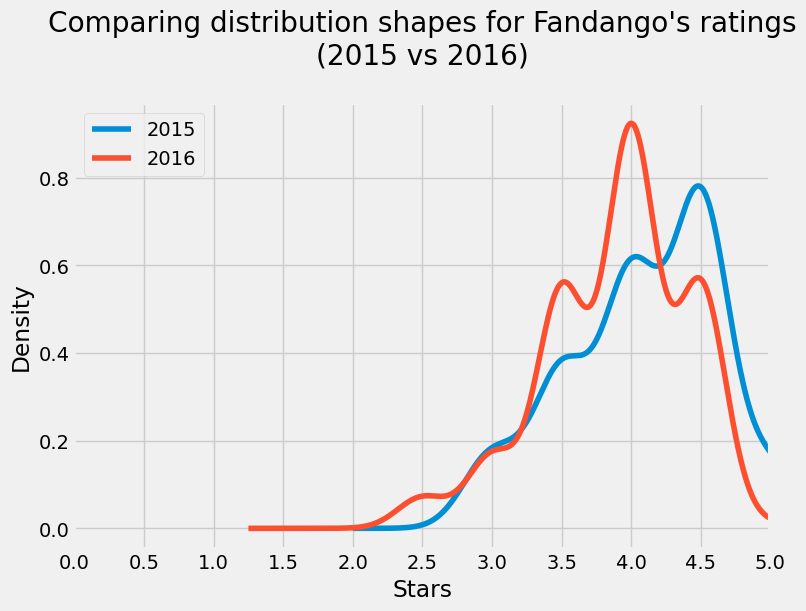

In [19]:
# add fivethirtyeight style
plt.style.use('fivethirtyeight')

# plotting ratings for both dfs
fandango_2015_df['Fandango_Stars'].plot.kde(label='2015', 
                                            legend=True, 
                                            figsize=(8, 5.5)
                                           )

fandango_2016_df['fandango'].plot.kde(label='2016', 
                                      legend=True
                                     )

# Adding title
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y=1.07)  # the `y` parameter pads the title upward

# adding x label
plt.xlabel('Stars')

# Adding X limits as ratings start at 0 and end at 5. Otherwise the kernel 
# density plot will tailing off past 5
plt.xlim(0, 5)

# increase x tick labels from increments of 1 to increments of 0.5
plt.xticks(np.arange(0, 5.1, 0.5))

plt.show()

---
**Observation from above plot**

- 2015 data has a high distribution of ratings at 4.5 and above, which may be a result of the 'rounding' error that Fandango's claims to have had at the time of the data being collected.

- Both data sets are left skewed and have only high ratings, no moves is rated below 2 stars. This could a result of the movies being popular; hence, may worthy of more than 2 stars. However, Fandango does sell tickets which makes these high ratings a little suspicious.

- The direction of the difference between 2015 to 2016 shows that 2016 is slightly lower than 2015.

## 5. Comparing Relative Frequenies
---

The kernel density plot above gives some good initial insights in the rating count distribution, but it smooths the data out and so the next step is take a more granular look into this distributions. In this section this we be done by simply comparing frequency distribution tables on the rating counts of the two dataframes.

In [20]:
print('2015 Freq table' + '\n' + '_' * 16)
fandango_2015_df['Fandango_Stars'].value_counts(normalize=True
                                               ).sort_index() * 100

2015 Freq table
________________


Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [21]:
print('2016 Freq table' + '\n' + '_' * 16)
fandango_2016_df['fandango'].value_counts(normalize=True
                                           ).sort_index() * 100

2016 Freq table
________________


fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

---
**Observation from above plot**

The frequency tables above somewhat agree with the kernel plot above; however, there are some differences - namely, the  2016 data has a higher percentage of ratings with 3.5 and 4 stars which disagrees with the kernel plot. Apart from this difference the general distribution between frequency tables and the Kernel plot holds, with 2015 data having a higher percentage of movies with a high rating. For instance, 2016 has `0.5%` of movies with 5 stars, whereas, 2015 data has `7%` of movies with 5 stars. The reasons for this could be sinister or not. For example, there may have been some really great movies in 2015 and some really poor ones in 2016. But ideally considering this data across years either side of 2015 and 2016 would be of use.

It should also be noted that `fandango_2016_df` has `191` movies, whereas `fandango_2015_df` has `129`. We also know that the `fandango_2016_df` dataframe contains at least one movie with a fan rating count of less than 30.

In [22]:
fandango_2016_df.shape

(191, 3)

In [23]:
fandango_2015_df.shape

(129, 6)

## 6. Determining the Direction of the Change
---

The section aims to get a more precise understand of the direction of change between 2015 and 2016 but comparing some summary statistics.

In [24]:
# Computing summary stats
mean_2015 = fandango_2015_df['Fandango_Stars'].mean()
mean_2016 = fandango_2016_df['fandango'].mean()

median_2015 = fandango_2015_df['Fandango_Stars'].median()
median_2016 = fandango_2016_df['fandango'].median()

mode_2015 = fandango_2015_df['Fandango_Stars'].mode()[0] # [0] required for mode on a series
mode_2016 = fandango_2016_df['fandango'].mode()[0]

# creating an empty dataframe for the summary stats
summary_stats_df = pd.DataFrame()
summary_stats_df['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats_df['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats_df.index = ['mean', 'median', 'mode']
summary_stats_df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


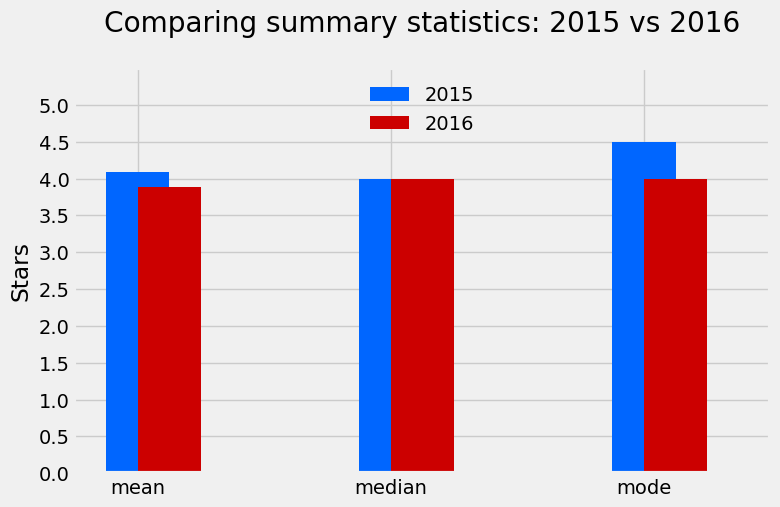

In [25]:
plt.style.use('fivethirtyeight')
summary_stats_df['2015'].plot.bar(color='#0066FF', align='center', 
                                  label='2015', width=0.25
                                 )
summary_stats_df['2016'].plot.bar(color='#CC0000', align='edge', 
                                  label='2016', width=0.25,
                                rot=0, figsize=(8, 5)
                                 )

plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylim(0, 5.5)
plt.yticks(np.arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha=0, loc='upper center')
plt.show()

In [26]:
# check the difference in mean - difficult to see exactly from plot
round((summary_stats_df.loc['mean'][0] - summary_stats_df.loc['mean'][1]) 
                                / summary_stats_df.loc['mean'][0] * 100, 1)

4.8

---
**Observation from above plot**

- There is a `4.8%` drop in mean from 2015 to 2016

- Clearly their medians are the same

- Lastly, there is a `0.5` (approx `10%`) star rating difference between modes

The summary statistics show a clear direction in the reduction in the ratings from 2015 to 2016. Reasons for this were discussed in more detail in the observations in Section 5.

In [27]:
# check the exact difference in mode
round((summary_stats_df.loc['mode'][0] - summary_stats_df.loc['mode'][1]) 
                                / summary_stats_df.loc['mode'][0] * 100, 1)

11.1